Importing libraries 

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

Reading and cleaning our data

In [74]:
df = pd.read_csv("cancer-risk-factors.csv")
print(df)

     Patient_ID Cancer_Type  Age  Gender  Smoking  Alcohol_Use  Obesity  \
0        LU0000      Breast   68       0        7            2        8   
1        LU0001    Prostate   74       1        8            9        8   
2        LU0002        Skin   55       1        7           10        7   
3        LU0003       Colon   61       0        6            2        2   
4        LU0004        Lung   67       1       10            7        4   
...         ...         ...  ...     ...      ...          ...      ...   
1995     ST0395       Colon   60       1        4            6        4   
1996     ST0396    Prostate   84       1        5            7        8   
1997     ST0397        Lung   65       0        7            2       10   
1998     ST0398        Lung   64       1       10            2       10   
1999     ST0399      Breast   64       0        3            4       10   

      Family_History  Diet_Red_Meat  Diet_Salted_Processed  ...  \
0                  0            

In [75]:
#(rows, columns)
df.shape 

(2000, 21)

In [76]:
#checking for missing values
df.isnull().sum()

Patient_ID                 0
Cancer_Type                0
Age                        0
Gender                     0
Smoking                    0
Alcohol_Use                0
Obesity                    0
Family_History             0
Diet_Red_Meat              0
Diet_Salted_Processed      0
Fruit_Veg_Intake           0
Physical_Activity          0
Air_Pollution              0
Occupational_Hazards       0
BRCA_Mutation              0
H_Pylori_Infection         0
Calcium_Intake             0
Overall_Risk_Score         0
BMI                        0
Physical_Activity_Level    0
Risk_Level                 0
dtype: int64

In [77]:
#checking for duplicate rows
df.duplicated().sum()

np.int64(0)

In [78]:
#statistical summary of the dataset
df.describe() 

,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,Fruit_Veg_Intake,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000
mean,63.248000,0.489000,5.157000,5.035000,5.967500,0.194500,5.189500,4.563500,4.927500,4.015000,5.323000,4.979000,0.032500,0.19650,3.94050,0.454449,26.183350,4.938500
std,10.462946,0.500004,3.325339,3.260996,3.061393,0.395914,3.154452,3.088323,3.045305,2.978458,3.207462,3.212899,0.177368,0.39745,3.04887,0.123074,3.947459,3.166027
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.029285,15.000000,0.000000
25%,56.000000,0.000000,2.000000,2.000000,4.000000,0.000000,3.000000,2.000000,3.000000,1.000000,3.000000,2.000000,0.000000,0.00000,1.00000,0.366982,23.500000,2.000000
50%,64.000000,0.000000,5.000000,5.000000,6.000000,0.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000,0.000000,0.00000,4.00000,0.455399,26.200000,5.000000
75%,70.000000,1.000000,8.000000,8.000000,9.000000,0.000000,8.000000,7.000000,8.000000,6.000000,8.000000,8.000000,0.000000,0.00000,6.00000,0.539782,28.700000,8.000000
max,90.000000,1.000000,10.000000,10.000000,10.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.00000,10.00000,0.852158,41.400000,10.000000


In [79]:
#listing all columns
df.columns 

Index(['Patient_ID', 'Cancer_Type', 'Age', 'Gender', 'Smoking', 'Alcohol_Use',
       'Obesity', 'Family_History', 'Diet_Red_Meat', 'Diet_Salted_Processed',
       'Fruit_Veg_Intake', 'Physical_Activity', 'Air_Pollution',
       'Occupational_Hazards', 'BRCA_Mutation', 'H_Pylori_Infection',
       'Calcium_Intake', 'Overall_Risk_Score', 'BMI',
       'Physical_Activity_Level', 'Risk_Level'],
      dtype='object')

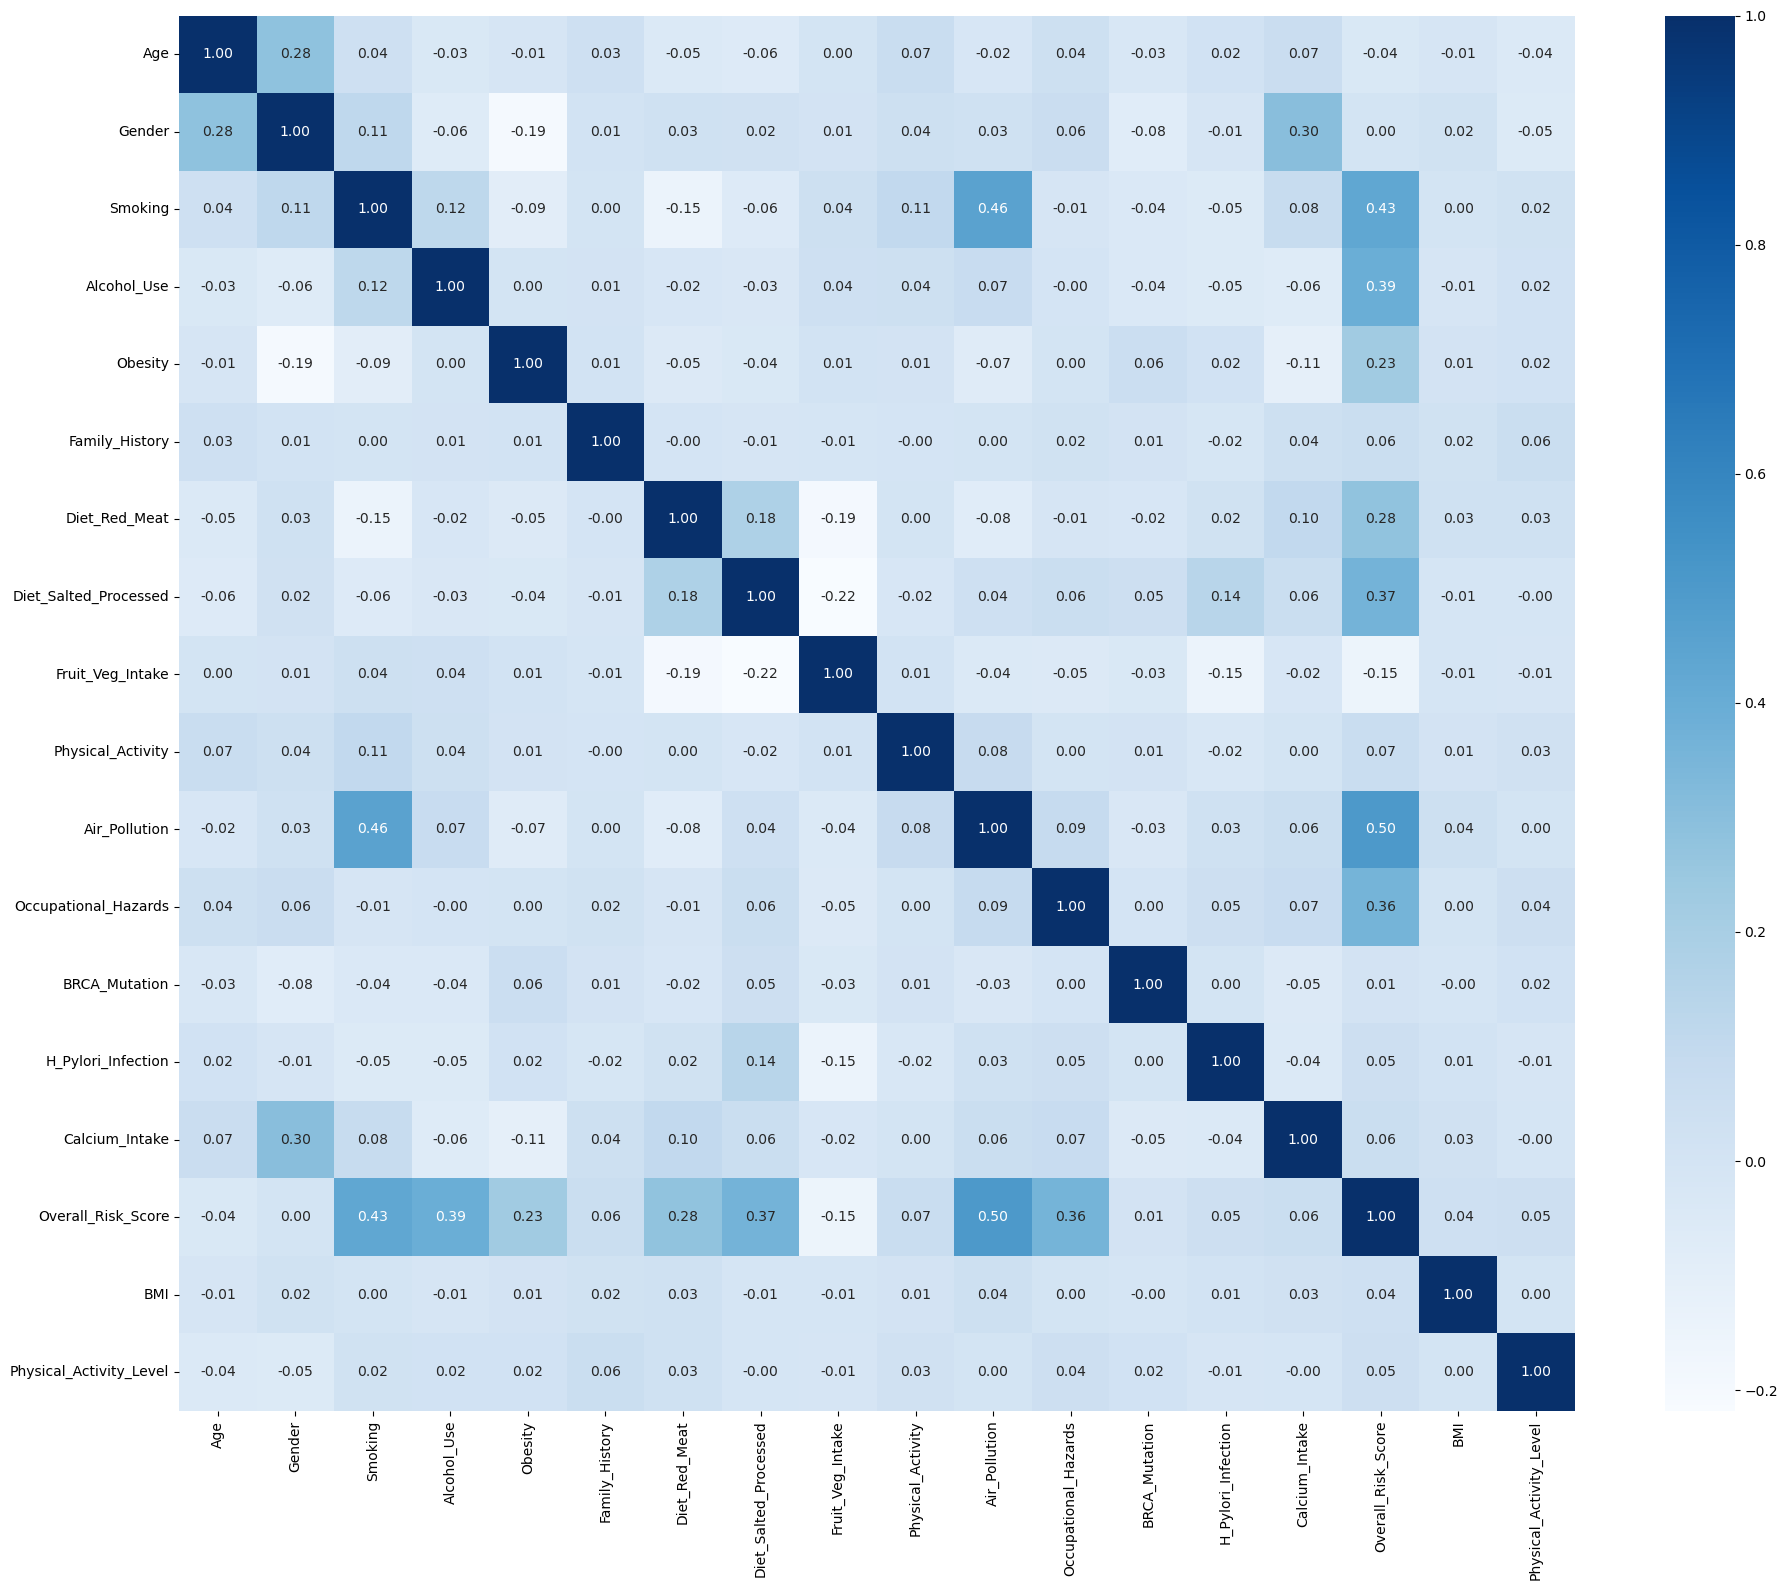

In [80]:
#checking if any of the numberical variables have high correlation
corr = df.select_dtypes(include="number").corr()

#creating bigger figure
plt.figure(figsize=(20, 16)) 
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [81]:
df.dtypes

Patient_ID                  object
Cancer_Type                 object
Age                          int64
Gender                       int64
Smoking                      int64
Alcohol_Use                  int64
Obesity                      int64
Family_History               int64
Diet_Red_Meat                int64
Diet_Salted_Processed        int64
Fruit_Veg_Intake             int64
Physical_Activity            int64
Air_Pollution                int64
Occupational_Hazards         int64
BRCA_Mutation                int64
H_Pylori_Infection           int64
Calcium_Intake               int64
Overall_Risk_Score         float64
BMI                        float64
Physical_Activity_Level      int64
Risk_Level                  object
dtype: object

Define y (target) and x (dropping columns)

In [82]:
#split off target first
y = df["Risk_Level"]
X = df.drop(columns=["Risk_Level"]) 

print(X.columns)

Index(['Patient_ID', 'Cancer_Type', 'Age', 'Gender', 'Smoking', 'Alcohol_Use',
       'Obesity', 'Family_History', 'Diet_Red_Meat', 'Diet_Salted_Processed',
       'Fruit_Veg_Intake', 'Physical_Activity', 'Air_Pollution',
       'Occupational_Hazards', 'BRCA_Mutation', 'H_Pylori_Infection',
       'Calcium_Intake', 'Overall_Risk_Score', 'BMI',
       'Physical_Activity_Level'],
      dtype='object')


Automatically preprocesses the dataset by one-hot encoding categorical features and scaling numerical features using a ColumnTransformer

In [83]:
#detect columns from X (not df - only looking at data where target has been removed)
categorical_cols = X.select_dtypes(include=["object"]).columns 
numeric_cols = X.select_dtypes(exclude=["object"]).columns

#build preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols), #onehot encoding
        ("num", StandardScaler(), numeric_cols), #scales numerical features so income (e.g. 80,000) does not dominates bmi (e.g. 22) barely matters in regression.
    ],
    remainder="drop",
)


Split/test data, Linear regression 

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# train the model
model.fit(X_train, y_train)

print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy :", model.score(X_test, y_test))

# flere metrics (valgfrit)
y_pred = model.predict(X_test)
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification report:")
print(classification_report(y_test, y_pred))


Train accuracy: 0.996875
Test accuracy : 0.9725

Confusion matrix:
[[ 11   0   5]
 [  0  54   3]
 [  0   3 324]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.69      0.81        16
           1       0.95      0.95      0.95        57
           2       0.98      0.99      0.98       327

    accuracy                           0.97       400
   macro avg       0.97      0.88      0.92       400
weighted avg       0.97      0.97      0.97       400



/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


DecisonTreeRegressor

In [85]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=15,
    random_state=42
)

tree_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", tree)
])

tree_pipeline.fit(X_train, y_train)
print("Train accuracy:", tree_pipeline.score(X_train, y_train))
print("Test accuracy:", tree_pipeline.score(X_test, y_test))


Train accuracy: 1.0
Test accuracy: 0.9975


/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


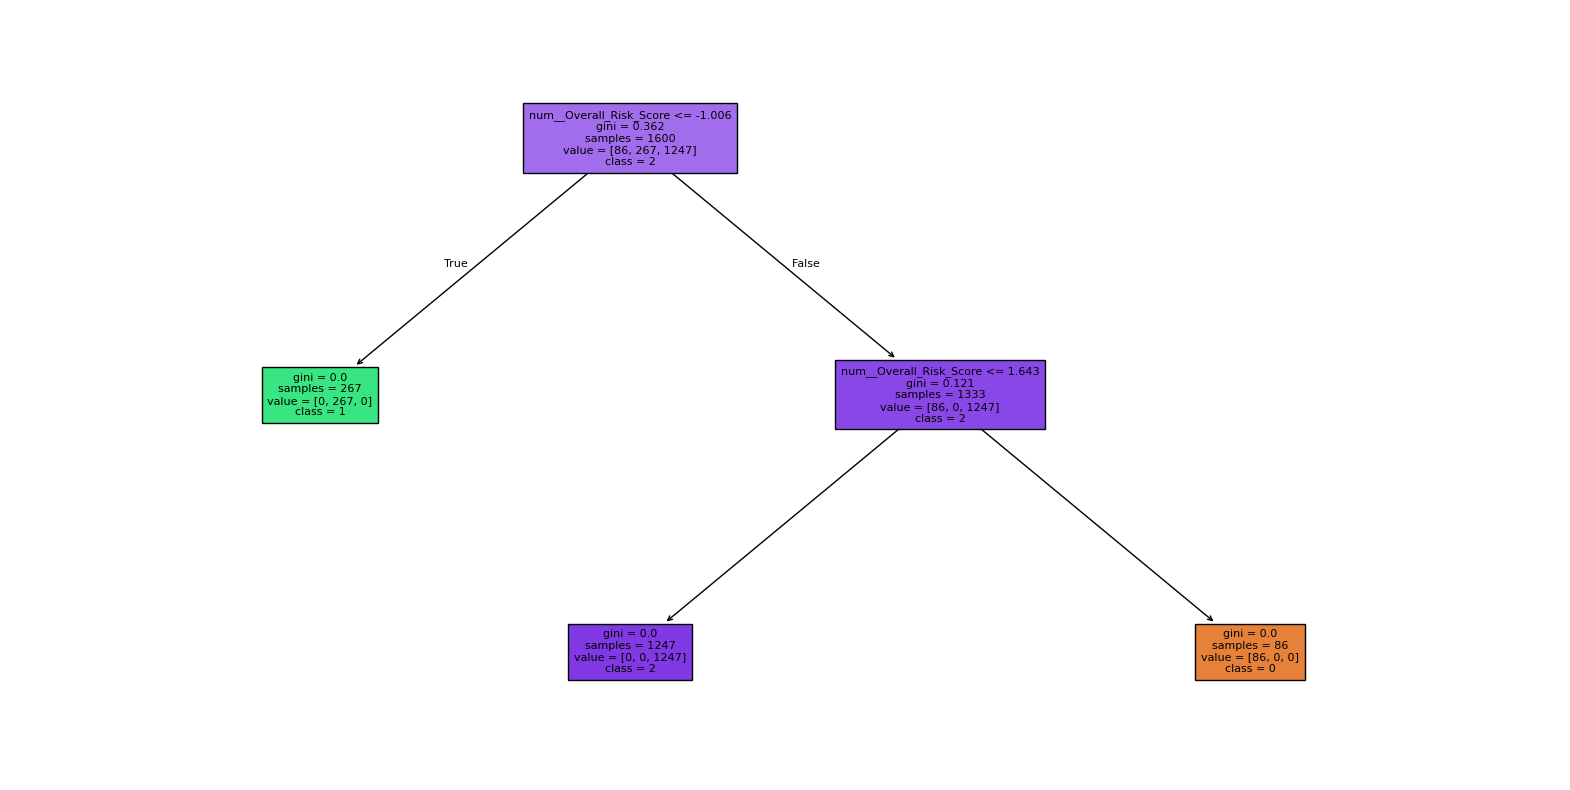

In [86]:
from sklearn import tree
import matplotlib.pyplot as plt

# feature names efter preprocessing (pipeline skal være fit'et først)
feature_names = tree_pipeline.named_steps["preprocessor"].get_feature_names_out()

# klassernes navne (fra din classifier)
class_names = tree_pipeline.named_steps["classifier"].classes_.astype(str)

plt.figure(figsize=(20, 10))

tree.plot_tree(
    tree_pipeline.named_steps["classifier"],  # decision tree modellen fra pipelinen
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    fontsize=8
)

plt.show()


Defining our regressor-function that calls other models

In [87]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import numpy as np

def evaluate_classifier(name, model, X_train, X_test, y_train, y_test):
    # forudsigelser
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)

    # accuracy
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test  = accuracy_score(y_test, y_pred_test)

    # F1-score (weighted så den tager højde for class-imbalance)
    f1_train = f1_score(y_train, y_pred_train, average="weighted")
    f1_test  = f1_score(y_test, y_pred_test, average="weighted")

    print(f"{name}")
    print(f"Train: acc={acc_train:.3f}, F1={f1_train:.3f}")
    print(f"Test : acc={acc_test:.3f}, F1={f1_test:.3f}")
    print()

    # valgfrit: mere detaljeret output
    print("Classification report (test):")
    print(classification_report(y_test, y_pred_test))
    print("Confusion matrix (test):")
    print(confusion_matrix(y_test, y_pred_test))
    print("-" * 60)



Evaluation of linear regression and decision tree

In [88]:
# Logistic Regression (classifier)
evaluate_classifier("Logistic Regression", model, X_train, X_test, y_train, y_test)

# Decision Tree (classifier-pipeline)
evaluate_classifier("Decision Tree", tree_pipeline, X_train, X_test, y_train, y_test)


Logistic Regression
Train: acc=0.997, F1=0.997
Test : acc=0.973, F1=0.971

Classification report (test):
              precision    recall  f1-score   support

           0       1.00      0.69      0.81        16
           1       0.95      0.95      0.95        57
           2       0.98      0.99      0.98       327

    accuracy                           0.97       400
   macro avg       0.97      0.88      0.92       400
weighted avg       0.97      0.97      0.97       400

Confusion matrix (test):
[[ 11   0   5]
 [  0  54   3]
 [  0   3 324]]
------------------------------------------------------------
Decision Tree
Train: acc=1.000, F1=1.000
Test : acc=0.998, F1=0.997

Classification report (test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.98      0.99        57
           2       1.00      1.00      1.00       327

    accuracy                           1.00       400
   macro av

/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Ridge and Lasso using 5-fold cross-validation

In [89]:
from sklearn.linear_model import RidgeClassifierCV

ridge_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RidgeClassifierCV(alphas=[0.1, 1.0, 10.0], cv=5))
])

from sklearn.linear_model import LogisticRegression

lasso_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        penalty="l1",
        solver="liblinear",   # kræves for L1
        C=1.0                 # inverse af lambda
    ))
])

from sklearn.model_selection import GridSearchCV

lasso_cv = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        penalty="l1",
        solver="liblinear"
    ))
])

param_grid = {
    "classifier__C": [0.01, 0.1, 1.0, 10.0]
}

lasso_clf = GridSearchCV(lasso_cv, param_grid, cv=5)

ridge_clf.fit(X_train, y_train)
lasso_clf.fit(X_train, y_train)

evaluate_classifier("Ridge Classifier", ridge_clf, X_train, X_test, y_train, y_test)
evaluate_classifier("L1 Logistic Regression (Lasso)", lasso_clf, X_train, X_test, y_train, y_test)

print("Ridge best alpha:", ridge_clf.named_steps["classifier"].alpha_)

print("Best C:", lasso_clf.best_params_["classifier__C"])



/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Ridge Classifier
Train: acc=1.000, F1=1.000
Test : acc=0.868, F1=0.830

Classification report (test):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       1.00      0.35      0.52        57
           2       0.86      1.00      0.93       327

    accuracy                           0.87       400
   macro avg       0.62      0.45      0.48       400
weighted avg       0.85      0.87      0.83       400

Confusion matrix (test):
[[  0   0  16]
 [  0  20  37]
 [  0   0 327]]
------------------------------------------------------------
L1 Logistic Regression (Lasso)
Train: acc=0.966, F1=0.961
Test : acc=0.968, F1=0.963

Classification report (test):
              precision    recall  f1-score   support

           0       1.00      0.44      0.61        16
           1       1.00      0.93      0.96        57
           2       0.96      1.00      0.98       327

    accuracy                           0.97       4

/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-define

Bagging

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    ))
])

# træning
rf_clf.fit(X_train, y_train)

# evaluering med din classifier-funktion
evaluate_classifier("Random Forest (Classifier)", rf_clf,
                    X_train, X_test, y_train, y_test)



Random Forest (Classifier)
Train: acc=0.779, F1=0.683
Test : acc=0.818, F1=0.735

Classification report (test):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        57
           2       0.82      1.00      0.90       327

    accuracy                           0.82       400
   macro avg       0.27      0.33      0.30       400
weighted avg       0.67      0.82      0.74       400

Confusion matrix (test):
[[  0   0  16]
 [  0   0  57]
 [  0   0 327]]
------------------------------------------------------------


/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-define

Finding the most important features in RandomForest

In [91]:
# hent random forest modellen ud af pipelinen
rf_clf_model = rf_clf.named_steps["classifier"]

# hent feature importances
importances = rf_clf_model.feature_importances_

# hent feature names efter preprocessing
feature_names = rf_clf.named_steps["preprocessor"].get_feature_names_out()

import pandas as pd

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

print(importance_df.head(20))



                           feature  importance
1618       num__Overall_Risk_Score    0.141997
1606              num__Alcohol_Use    0.104929
1605                  num__Smoking    0.084461
1600         cat__Cancer_Type_Lung    0.064311
1603                      num__Age    0.064117
1614     num__Occupational_Hazards    0.061289
1612        num__Physical_Activity    0.056957
1601     cat__Cancer_Type_Prostate    0.052030
1599        cat__Cancer_Type_Colon    0.048442
1611         num__Fruit_Veg_Intake    0.044419
1613            num__Air_Pollution    0.044374
1610    num__Diet_Salted_Processed    0.037895
1607                  num__Obesity    0.036889
1619                      num__BMI    0.032548
1620  num__Physical_Activity_Level    0.022902
1608           num__Family_History    0.020243
1609            num__Diet_Red_Meat    0.019213
1602         cat__Cancer_Type_Skin    0.016206
1604                   num__Gender    0.015355
1616       num__H_Pylori_Infection    0.013705


Boosting

In [92]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

gbr_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

# træning
gbr_clf.fit(X_train, y_train)

# evaluering (din classifier-evaluator)
evaluate_classifier("Gradient Boosting (Classifier)",
                    gbr_clf, X_train, X_test, y_train, y_test)




Gradient Boosting (Classifier)
Train: acc=1.000, F1=1.000
Test : acc=0.998, F1=0.997

Classification report (test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.98      0.99        57
           2       1.00      1.00      1.00       327

    accuracy                           1.00       400
   macro avg       1.00      0.99      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion matrix (test):
[[ 16   0   0]
 [  0  56   1]
 [  0   0 327]]
------------------------------------------------------------


/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


XGBoosting

In [93]:

from sklearn.preprocessing import LabelEncoder

# antager at y er din kolonne med "Low", "Medium", "High"
le = LabelEncoder()
y_encoded = le.fit_transform(y)   # -> 0,1,2 i stedet for strenge

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)


from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

xgbc = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        eval_metric="logloss"
    ))
])

xgbc.fit(X_train, y_train)

evaluate_classifier(
    "XGBoost (Classifier)",
    xgbc,
    X_train, X_test,
    y_train, y_test
)


XGBoost (Classifier)
Train: acc=1.000, F1=1.000
Test : acc=1.000, F1=1.000

Classification report (test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00       327

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion matrix (test):
[[ 16   0   0]
 [  0  57   0]
 [  0   0 327]]
------------------------------------------------------------


/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


KNearestNeighbor

In [94]:
# #PRØV FORSKELLIGE K-VÆRDIER I KNN (F.EKS. 3, 7, 10) OG SAMMENLIGN RESULTATERNE (SMALL K VÆRDIER KAN GIVE OVERFITTING (HØJ VARIANS), STØRRE K VÆRDIER KAN GIVE UNDERFITTING (BIAS))
# from sklearn.neighbors import KNeighborsRegressor

# k_values = [1, 3, 5, 7, 10, 15] #different k values to try
# for k in k_values: #loop through k values
#     knn_k = Pipeline(steps=[ #create KNN regression pipeline
#         ("preprocessor", preprocessor),
#         ("regressor", KNeighborsRegressor(n_neighbors=k))
#     ])
#     knn_k.fit(X_train, y_train)
#     evaluate_regressor(f"KNN (k={k})", knn_k, X_train, X_test, y_train, y_test) 


GridSearch KNN - systematic hyperparameter tuning with cross-validation

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# hyperparameter tuning for KNN (CLASSIFICATION)
param_grid_knn = {
    "classifier__n_neighbors": [3, 5, 7, 10, 12, 15, 20, 30, 40, 100, 200],
    "classifier__weights": ["uniform", "distance"]  # uniform vs distance weighting
}

# create KNN classification pipeline
knn_base = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier())
])

# grid search with 5-fold cross-validation
grid_knn = GridSearchCV(
    knn_base,
    param_grid_knn,
    cv=5,
    scoring="accuracy",      # klassifikations-metric
    n_jobs=-1
)

# fit grid search
grid_knn.fit(X_train, y_train)

print("Best params KNN:", grid_knn.best_params_)

# brug din classifier-evaluator
evaluate_classifier(
    "KNN (tuned)",
    grid_knn.best_estimator_,
    X_train, X_test,
    y_train, y_test
)



/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Best params KNN: {'classifier__n_neighbors': 20, 'classifier__weights': 'uniform'}
KNN (tuned)
Train: acc=0.876, F1=0.854
Test : acc=0.897, F1=0.879

Classification report (test):
              precision    recall  f1-score   support

           0       1.00      0.06      0.12        16
           1       0.86      0.65      0.74        57
           2       0.90      0.98      0.94       327

    accuracy                           0.90       400
   macro avg       0.92      0.56      0.60       400
weighted avg       0.90      0.90      0.88       400

Confusion matrix (test):
[[  1   0  15]
 [  0  37  20]
 [  0   6 321]]
------------------------------------------------------------


/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Baseline model - skal den stå her?

In [96]:
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline

baseline_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DummyClassifier(strategy="most_frequent"))
])

baseline_clf.fit(X_train, y_train)

evaluate_classifier(
    "Baseline (most frequent)",
    baseline_clf,
    X_train, X_test,
    y_train, y_test
)


Baseline (most frequent)
Train: acc=0.779, F1=0.683
Test : acc=0.818, F1=0.735

Classification report (test):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        57
           2       0.82      1.00      0.90       327

    accuracy                           0.82       400
   macro avg       0.27      0.33      0.30       400
weighted avg       0.67      0.82      0.74       400

Confusion matrix (test):
[[  0   0  16]
 [  0   0  57]
 [  0   0 327]]
------------------------------------------------------------


/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-define

Creating a table for all of our results

In [97]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

results = []   # store all model results here

def evaluate_classifier(name, model, X_train, X_test, y_train, y_test):
    # predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # metrics (weighted handles class imbalance)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test  = accuracy_score(y_test, y_pred_test)

    f1_train = f1_score(y_train, y_pred_train, average="weighted")
    f1_test  = f1_score(y_test, y_pred_test, average="weighted")

    prec_train = precision_score(y_train, y_pred_train, average="weighted")
    prec_test  = precision_score(y_test, y_pred_test, average="weighted")

    recall_train = recall_score(y_train, y_pred_train, average="weighted")
    recall_test  = recall_score(y_test, y_pred_test, average="weighted")

    # print nicely
    print(f"\n{name}")
    print(f"Train: acc={acc_train:.3f}, F1={f1_train:.3f}, precision={prec_train:.3f}, recall={recall_train:.3f}")
    print(f"Test : acc={acc_test:.3f}, F1={f1_test:.3f}, precision={prec_test:.3f}, recall={recall_test:.3f}")

    # store in global results list
    results.append({
        "model": name,
        "acc_train": acc_train,
        "acc_test": acc_test,
        "f1_train": f1_train,
        "f1_test": f1_test,
        "precision_train": prec_train,
        "precision_test": prec_test,
        "recall_train": recall_train,
        "recall_test": recall_test
    })


Residual (error) analysis for our chosen regression model

/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


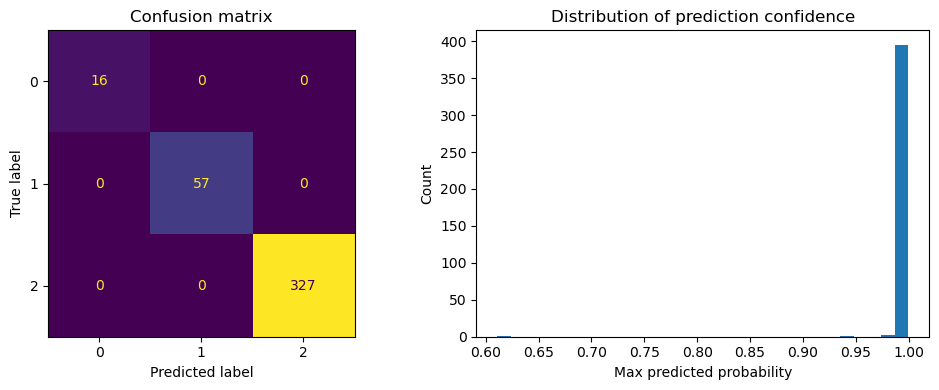

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# vælg din bedste classifier-model
best_model = xgbc   # eller rf_clf, gbr_clf, knn, osv.

# forudsigelser
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)   # sandsynligheder pr. klasse

plt.figure(figsize=(10, 4))

# 1) Confusion matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=plt.gca(), colorbar=False)
plt.title("Confusion matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")

# 2) Histogram over prediction confidence
plt.subplot(1, 2, 2)
max_proba = y_proba.max(axis=1)   # modelens sikkerhed på sin valgte klasse
plt.hist(max_proba, bins=30)
plt.xlabel("Max predicted probability")
plt.ylabel("Count")
plt.title("Distribution of prediction confidence")

plt.tight_layout()
plt.show()


                                                                                                                                                                                    ALL CODE BELOW BELONGS TO CLUSTERING

Prepping for clustering with KMeans

In [99]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#scale numeric data so the features hold the same weight
X_num = df[numeric_cols]
X_scaled = StandardScaler().fit_transform(X_num) 

inertias = []
silhouettes = []
k_values = range(2, 8)

#asking KMeans to make k clusters
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)

    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

print("Inertias:", inertias)
print("Silhouettes:", silhouettes)


Inertias: [32997.86783526655, 31339.837798093235, 30084.920851107396, 29058.200970022393, 28146.514927193974, 26388.192957284555]
Silhouettes: [np.float64(0.08094874254301897), np.float64(0.06994241700005227), np.float64(0.06619101720394417), np.float64(0.06565441386446107), np.float64(0.06682557277664579), np.float64(0.07463598169948102)]


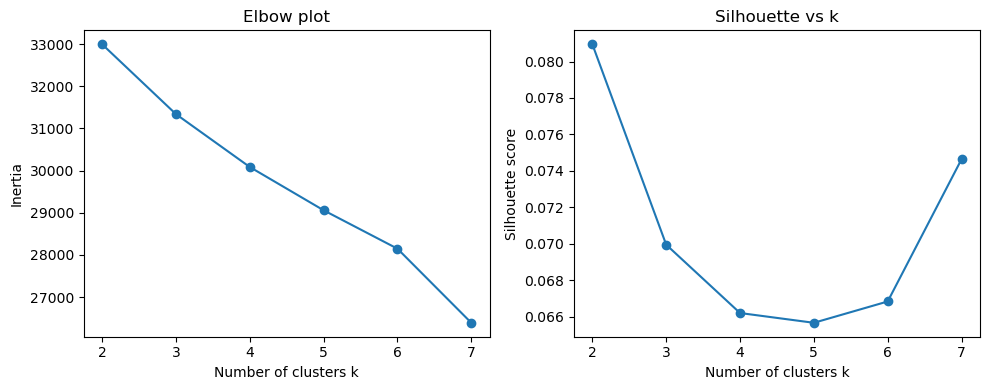

In [100]:
k_values = range(2, 8)

plt.figure(figsize=(10,4))

#elbow (inertia)
plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker="o")
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia")
plt.title("Elbow plot")

#silhouette
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouettes, marker="o")
plt.xlabel("Number of clusters k")
plt.ylabel("Silhouette score")
plt.title("Silhouette vs k")

plt.tight_layout()
plt.show()


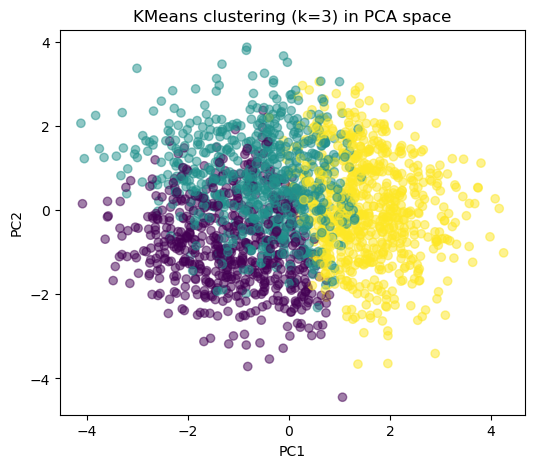

               Age    Gender   Smoking  Alcohol_Use   Obesity  Family_History  \
cluster                                                                         
0        58.331250  0.017188  3.425000     4.628125  6.801563        0.176563   
1        68.291217  0.963020  4.149461     4.024653  4.953775        0.167951   
2        63.070323  0.481013  7.635724     6.323488  6.142053        0.234880   

         Diet_Red_Meat  Diet_Salted_Processed  Fruit_Veg_Intake  \
cluster                                                           
0             4.696875               3.951563          5.265625   
1             5.342065               4.399076          5.101695   
2             5.493671               5.264416          4.464135   

         Physical_Activity  Air_Pollution  Occupational_Hazards  \
cluster                                                           
0                 3.384375       3.798437              4.026562   
1                 3.966102       4.016949              4.

Exception ignored in: <function ResourceTracker.__del__ at 0x106fd5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1051b1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1026fdbc0>
Traceback (most recent call last

In [104]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

best_k = 3

km = KMeans(n_clusters=best_k, random_state=42, n_init="auto", max_iter=100)
labels = km.fit_predict(X_scaled)

#project to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled) 

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"KMeans clustering (k={best_k}) in PCA space")
plt.show()

#taking the mean of every value in each cluster
df_clusters = df.copy()
df_clusters["cluster"] = labels

print(df_clusters.groupby("cluster")[numeric_cols].mean())

Måske ikke pensum: Fairness check by gender (or similar column) AND Fairness / group comparison by age groups

In [105]:
from sklearn.metrics import accuracy_score

# vælg din hovedmodel til fairness-checks
best_model = xgbc   # eller rf_clf, gbr_clf, osv.

# prediction for alle rækker i det originale X
y_pred_all_encoded = best_model.predict(X)

# konverter tilbage til labels, så vi kan læse det
y_pred_all = le.inverse_transform(y_pred_all_encoded)

df_eval = df.copy()
df_eval["y_true"] = y              # de originale labels (Low/Medium/High)
df_eval["y_pred"] = y_pred_all

# se hvilke kategoriske kolonner vi kan gruppere på
cat_cols = df.select_dtypes(include="object").columns.tolist()
print("Categorical columns in the data:", cat_cols)

# vælg en kategorisk kolonne til fairness / gruppe-analyse
# skift til f.eks. "gender", "smoker", "region" alt efter dit dataset
group_col = "sex"

if group_col in df_eval.columns:
    print(f"\nAccuracy by {group_col}:")
    
    # accuracy pr. gruppe
    group_stats = df_eval.groupby(group_col).apply(
        lambda g: (g["y_true"] == g["y_pred"]).mean()
    ).to_frame(name="accuracy")
    print(group_stats)

    # valgfrit: fordeling af forudsagte klasser pr. gruppe
    print("\nPredicted class distribution by group:")
    print(pd.crosstab(df_eval[group_col], df_eval["y_pred"], normalize="index"))
else:
    print(f"\nColumn {group_col} not found. "
          f"Set group_col to one of these: {cat_cols}")

# --- alder / age-grupper (kun hvis 'age' findes) ---
age_col = "age"

if age_col in df_eval.columns:
    df_eval["age_bin"] = pd.cut(
        df_eval[age_col],
        bins=[0, 30, 50, 120],
        labels=["<30", "30–50", ">50"]
    )

    print("\nAccuracy by age group:")
    age_stats = df_eval.groupby("age_bin").apply(
        lambda g: (g["y_true"] == g["y_pred"]).mean()
    ).to_frame(name="accuracy")
    print(age_stats)

    print("\nPredicted class distribution by age group:")
    print(pd.crosstab(df_eval["age_bin"], df_eval["y_pred"], normalize="index"))
else:
    print(f"\nColumn {age_col} not found – skipping age-group analysis.")


Categorical columns in the data: ['Patient_ID', 'Cancer_Type', 'Risk_Level']

Column sex not found. Set group_col to one of these: ['Patient_ID', 'Cancer_Type', 'Risk_Level']

Column age not found – skipping age-group analysis.


/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
